# Resolución de una ecuación dispersiva lineal mediante series de Fourier

$$
\frac{\partial  u}{\partial t } + a\, \frac{\partial^2 u}{\partial x^3} = 0, \qquad   x\in S^1, \quad t>0.
$$
Las condiciones de borde son peródicas
$$
u(t, -\pi ) = u(t, \pi ), \quad u_x(t, -\pi ) = u_x(t, \pi ), \quad u_{xx}(t, -\pi ) = u_{xx}(t, \pi ),
$$
y la  condición inicial es $u(0,x) = f(x)$
 

## Solución explícita
Ver por ejemplo [P. Olver](http://www-users.math.umn.edu/~olver/pde.html) Section 8.5 Dispersion and solitons

$$
u(t,x) = \frac{a_0}{2}+ \sum_{n = 1}^{\infty} \left(a_n\, \cos{n^3\, t}+ b_n\, \sin{n^3\, t}\right)\cos{ n\, x} +  \left(-a_n\, \sin{n^3\, t}+ b_n\, \cos{n^3\, t}\right)\sin{ n\, x},
$$
en donde 
$$
a_n = \frac{1}{\pi}\int_{-\pi}^{\pi} f(x)\, \cos{ n\,   x} \, dx,  \quad 
d_n = \frac{1}{\pi}\int_{-\pi}^{\pi} f(x)\, \sin{ n\,   x} \, dx
$$ 

In [1]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
 
# Vamos a usar integración numérica. ##########################
M = 3000   # tamaño de la discretización en x para integrar y graficar 
################################################
x = np.linspace(-np.pi, np.pi, M)
########################################
# Algunos parámetros para definir la condición inicial
gaus = np.exp(-6*(np.tan(x/2))**2 )
ampl, wd  = 0.75, np.pi/6
bloque = np.piecewise(x, [np.abs(x) < wd, np.abs(x) > wd], [ampl, 0])
#######################################################
f = bloque

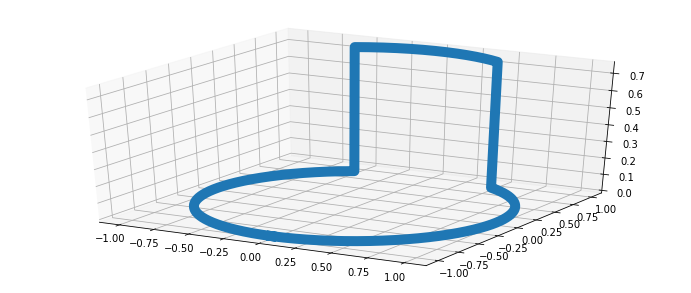

In [3]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111, projection='3d')
xx =  np.sin(x)
yy = np.cos(x)
ax.plot(xx, yy, f, lw = 10)
plt.show()

In [4]:
N = 500 # N es el número de terminos de los coeficientes de Fourier
import scipy.integrate as integrate #Los $a_n$ y $b_n$ se calculan por integración numérica
nn = np.array(range(N))
n = nn.reshape((N,1))
y = np.cos(n*x) 
a = (1/np.pi)*integrate.simps(y*f, x)
a = a.reshape((N,1))

z = np.sin(n*x) 
b = (1/np.pi)*integrate.simps(z*f, x)
b = b.reshape((N,1))

# Separación de variables espaciales
x_part1, x_part2 = a*y + b*z, -a*z +  b*y

In [5]:
def perfil(t):
    return np.sum(np.cos(n**3*t)*x_part1 + np.sin(n**3*t)*x_part2, axis = 0) 

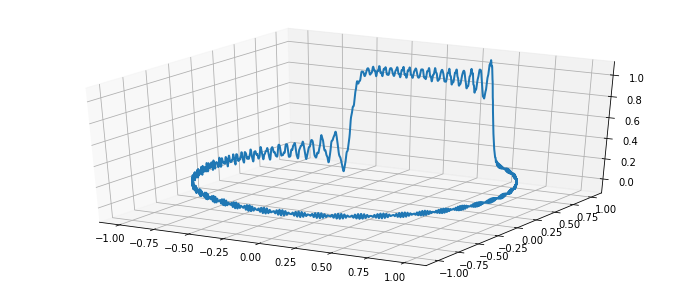

In [17]:
prof = perfil(0.00001)
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xx, yy, prof, lw = 2)
plt.show()

## Animación

In [7]:
import matplotlib.animation as animation

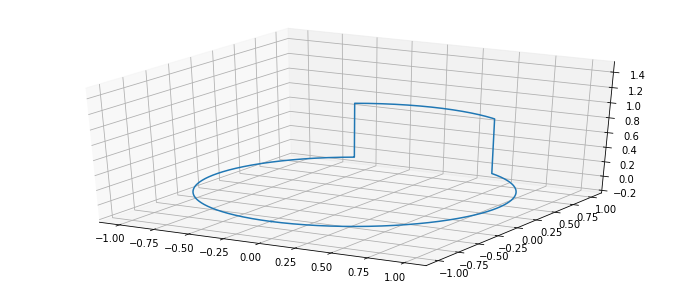

In [8]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim3d([-0.2, 1.5])
line, = ax.plot(xx, yy, f)

In [9]:
def animacion(i):
    #ax.set_zlim3d([-0.2, 1.5])
    ax.clear()
    ax.axis('off')
    prof = perfil(2*np.pi*i/400)
    line = ax.plot(xx, yy, prof,color= 'b')
    #line.set_ydata(perfil(i/(2*np.pi)))  # update the data
    return line,

In [10]:
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

In [12]:
ani = animation.FuncAnimation(fig, animacion, np.arange(1, 400), init_func=init,
                              interval=100, blit=False)
ani.save('onda_disp_S.mp4', metadata={'artist':'Socarronte'})
plt.show()